# 서울시 구별 cctv 현황 분석하기

- 서울시 각 구별 cctv 수를 분석하고, 인구대비 cctv 비율 파악해서 순서를 비교해 보자
- 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 분석해 보자
- pandas와 시각화를 방법을 적용해 보자

###### 1. 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np

###### 2. 데이터 불러오기

In [2]:
CCTV_Seoul = pd.read_csv('./Downloads/data_DS/01. CCTV_in_Seoul.csv', encoding='utf-8')
#encoding 방식 : utf-8, euc-kr, cp 949

In [3]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
CCTV_Seoul.columns[0]

'기관명'

#### 구별 CCTV 설치 현황

In [6]:
#첫번째 열의 이름을 '구별'로 변경
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


- 강남구에 집중적으로 2013년 이전에 설치되어 있음
- 2013년 이전 강남구의 투자배경 분석 필요 또는 주요 선거 및 사건 유무 확인 필요

###### 데이터 불러오기 - 엑셀파일 : 서울시 인구 현황

In [7]:
pop_seoul = pd.read_excel('./Downloads/data_DS/01. population_in_Seoul.xls')

In [8]:
pop_seoul = pd.read_excel('./Downloads/data_DS/01. population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B, D, G, J, N')

In [9]:
pop_seoul.rename(columns = {pop_seoul.columns[0]:'구별',
                            pop_seoul.columns[1]:'인구수',
                            pop_seoul.columns[2]:'한국인',
                            pop_seoul.columns[3]:'외국인',
                            pop_seoul.columns[4]:'고령자'}, inplace=True)

In [10]:
CCTV_Seoul.sort_values(by='소계', ascending=True).tail(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


In [11]:
#증가율(비율) 계산하기
#₩ : 줄바꿈
CCTV_Seoul['최근 증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근 증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 서울시 인구 데이터 파악해 보기

In [12]:
pop_seoul.drop([0], inplace=True)

In [13]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [14]:
#결측치(nan, NaN)는 처리하자 by drop, dropna, fillna
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [15]:
pop_seoul.drop([26], inplace=True)

In [16]:
#서울의 외국인 비율
pop_seoul['외국인 비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
#서울의 고령자 비율
pop_seoul['고령자 비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [17]:
#인구수, 외국인, 외국인 비율, 고령자, 고령자 비율 어디가 제일 top?
pop_seoul.sort_values(by='인구수', ascending=False)
#외국인

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


### DataFrame 병합하기 : concat, join, merge

In [18]:
#merge : 두 데이터의 공통 컬럼으로 연결
data_result = pd.merge(CCTV_Seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [19]:
#의미 없는 컬럼 날려버리기
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [20]:
data_result.set_index('구별')
data_result

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [21]:
#상관관계 분석 기준
#1) 0.1 거의 무시
#2) >=0.3 약한 상관관계
#3) >=0.7 강한 상관관계
#상관계수 coorcoef
np.corrcoef(data_result['고령자 비율'], data_result['소계'])
np.corrcoef(data_result['외국인 비율'], data_result['소계'])
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [22]:
#정렬
data_result.sort_values(by='소계', ascending=False).head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
18,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
14,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
21,은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
20,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [53]:
data_result = data_result.set_index('구별')
data_result

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.189970,425.290264
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.348536,329.592918
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911,35.989293
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170,125.483618


- CCTV가 많이 설치된 구와 인구수가 많은 구를 시각적으로 분석해 보는 것이 필요

In [23]:
import matplotlib.pyplot as plt

In [24]:
# matplotlib은 한글 지원 x
# 1) Windows OS
# 1) import matplotlib.pyplot as plt 정의했을 경우

# ① 나눔고딕 폰트가 설치되어 있다면,

# plt.rcParams['font.family'] = 'NanumGothic'
# ② 맑은고딕 폰트가 설치되어 있다면,

# plt.rcParams['font.family'] = 'Malgun Gothic'
# 2) mpl로 정의했을 경우

# import matplotlib as mpl # 시각화모듈 시 사용
# import matplotlib.pyplot as plt #시각화 모듈 시 사용
# ① 한줄로 정의

# mpl.rc('font',family= 'NanumGothic')
# ② 경로 설정해서 두줄로 정의

# font_name = mpl.font_manager.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
# mpl.rc('font',family=font_name)

# 2) Mac OS
# ① Apple Gothic 이 설치되어 있다면,

# plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['font.family'] = 'AppleGothic'


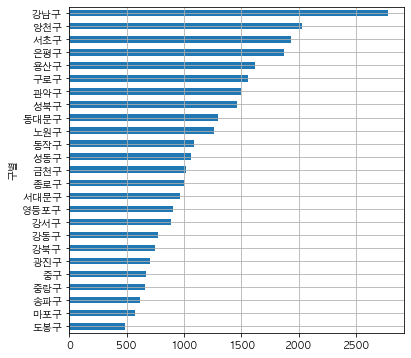

In [54]:
plt.figure()
#크기가 큰 구간부터 나올 수 있도록 정렬 => sort_values 사용
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))
plt.show()

- CCTV 갯수는 강남구가 타 지역구보다 월등히 많다.
- 상대적으로 양천구, 서초구, 은평구도 CCTV가 많다.
- 논리적 허점 : 인구수와 면적에 대한 고려가 안되어 있다.
    => 인구/면적대비 CCTV 비율이 추가적으로 필요함

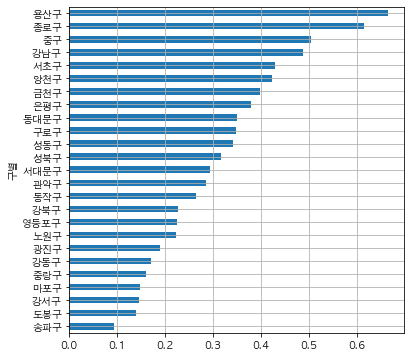

In [55]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(6,6));

- 분석결과 인구대비 CCTV 설치 대수가 용산구와 종로구가 월등히 높다.
- 송파구는 인구대비 CCTV 비율이 매우 낮게 나타난다.

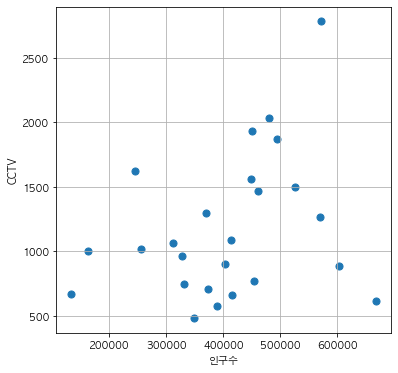

In [56]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

##### numpy에서 제공하는 polyfit 활용해서 시각화 분석

In [57]:
#최소제곱법 : 방정식을 근사적으로 구하는 방법, 실제 해와의 오차의 제곱이 최소가 되는 근사적인 해를 구하는 방법
#polyfit(x, y, n) : 최소제곱법 관점에서 'x, y데이터들에 대한 n차 방정식'의 최적의 계수를 반환
#poly1d : polynomial function 생성
#poly1d([1, 2, 3]) =! poly1d([1, 2, 3], True)
#linspace(시작, 끝, 개수, 끝 포함 여부) : 배열 생성
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [58]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

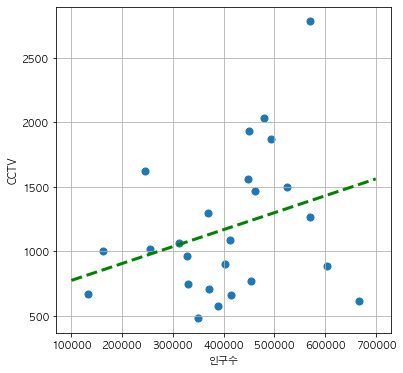

In [59]:
plt.figure(figsize = (6, 6))

plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

##### 조금 더 설득력 있는 자료를 만들어 보기

In [60]:
#중심의 경향에서 멀어져 있는 구를 다른 색으로 표현하기 위해서 오차를 계산하여 오차순으로 데이터 정렬

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


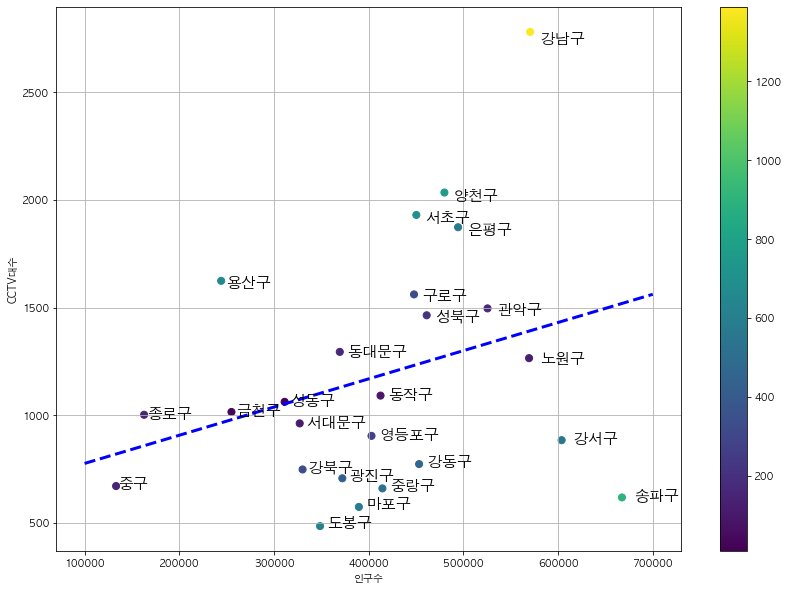

In [61]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='b')

#텍스트를 데이터에 표시해서 분석해 보기
for n in range(len(df_sort)):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.colorbar()
plt.grid()
plt.show()

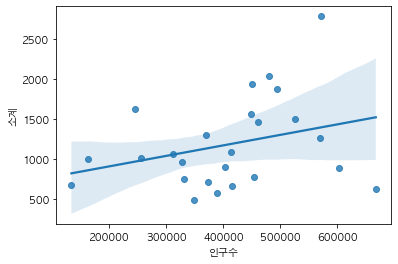

In [64]:
#regplot : 추세선, 선의 위아래로 옅게 표시된 부분은 추세선의 95% 신뢰구간을 나타낸다.
import seaborn as sns
sns.regplot(x=data_result['인구수'], y=data_result['소계']);